# Ressources  

* https://keras.io/about/  


# Régression non linéaire avec un réseau de neurones

* https://lucidar.me/fr/neural-networks/curve-fitting-nonlinear-regression/  

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')

Data created successfully


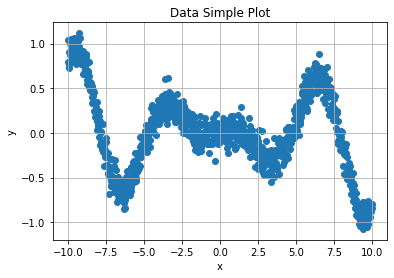

In [3]:
# Display the result
fig, ax = plt.subplots()

# Add a grid
ax.grid()
# Add a title to the axes
ax.set_title('Data Simple Plot')
# Add an x-label to the axes
ax.set_xlabel('x')
# Add a y-label to the axes
ax.set_ylabel('y')

# Add a legend
#ax.legend()

ax.scatter(x_data, y_data)


In [4]:
# Create the model
model_1 = keras.Sequential()
model_1.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model_1.add(keras.layers.Dense(units = 64, activation = 'relu'))
model_1.add(keras.layers.Dense(units = 64, activation = 'relu'))
model_1.add(keras.layers.Dense(units = 1, activation = 'linear'))
model_1.compile(loss='mse', optimizer="adam")

# Display the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


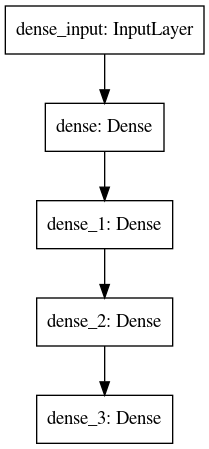

In [5]:
keras.utils.plot_model(model_1, "my_first_model_1.png")

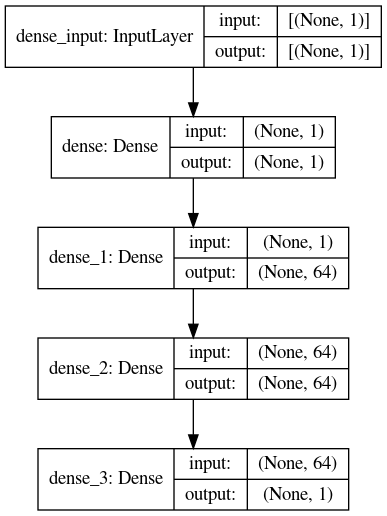

In [6]:
keras.utils.plot_model(model_1, "my_first_model_1_with_shape_info.png", show_shapes=True)

In [7]:
# Training
training_1 = model_1.fit( x_data, y_data, epochs=100, verbose=0)

In [8]:
print(list(training_1.history))
print(min(training_1.history['loss']))

['loss']
0.015331382863223553


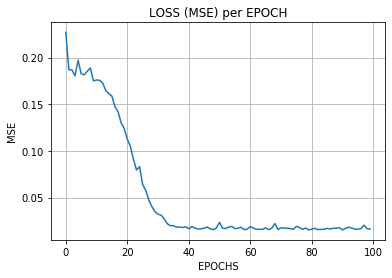

In [9]:
# plot metrics
fig, ax = plt.subplots()

# Add a grid
ax.grid()
# Add a title to the axes
ax.set_title('LOSS (MSE) per EPOCH')
# Add an x-label to the axes
ax.set_xlabel('EPOCHS')
# Add a y-label to the axes
ax.set_ylabel('MSE')

# Add a legend
#ax.legend()

ax.plot(training_1.history['loss'])


In [10]:
# Compute the output 
y_pred_1 = model_1.predict(x_data)


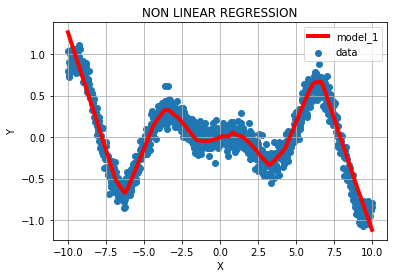

In [13]:
# Display the result
fig, ax = plt.subplots()

# Add a grid
ax.grid()
# Add a title to the axes
ax.set_title('1D NON LINEAR REGRESSION')
# Add an x-label to the axes
ax.set_xlabel('X')
# Add a y-label to the axes
ax.set_ylabel('Y')

ax.scatter(x_data[::1], y_data[::1], label='data')
ax.plot(x_data, y_pred_1, 'r', linewidth=4, label='model_1')

# Add a legend
ax.legend()
